# Simulation in Python

“This means that simulating random processes repeatedly is a way of approximating probability distributions without figuring out the probabilities mathematically or generating all possible random samples. Thus computer simulations become a powerful tool in data science. They can help data scientists understand the properties of random quantities that would be complicated to analyze in other ways.” [[1]](https://inferentialthinking.com/chapters/10/3/Empirical_Distribution_of_a_Statistic.html#the-power-of-simulation)

**Libraries and Packages**

- [`datascience`](http://data8.org/datascience/)

- [`numpy`](https://numpy.org/doc/stable/user/absolute_beginners.html)

- [`matplotlib`](https://matplotlib.org/stable/plot_types/index.html)

Run the cell below to import the libraries and packages we'll use to perform the simulations in this notebook.

In [2]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Sampling from a Table

The `sample` function (from the `datascience` package) draws uniformly at random with replacement from a `Table` object.

In [3]:
faces = np.arange(1, 7)
die = Table().with_columns('Face', faces)
type(die)

datascience.tables.Table

In [4]:
die

Face
1
2
3
4
5
6


In [6]:
die.sample(7)

Face
6
3
1
1
1
4
5


### Empirical Histograms

"Empirical distributions, on the other hand, are distributions of observed data. They can be visualized by empirical histograms." [[2]](https://inferentialthinking.com/chapters/10/1/Empirical_Distributions.html?highlight=simple%20random%20sample#id1)

In [7]:
# Set the bin width to 1 centered on the integers 1 through 6
die_bins = np.arange(0.5, 6.6, 1) 

def empirical_hist_die(n):
    """Sample n times time with replacement from the die Table 
       and make a histogram of the distribution.
    """
    die.sample(n).hist(bins=die_bins)

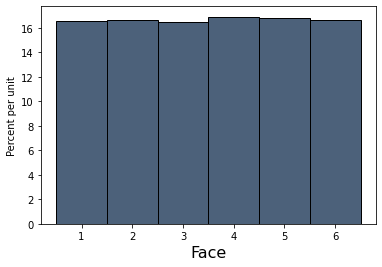

In [12]:
empirical_hist_die(100000)

**Question 1.** What do you notice as the sample size increases?

A `Table` can be made from an `array` object. 

- The `make_array()` function (from the `datascience` package) will make an array.

- The `.with_column()` function will make a table from an array.

In [13]:
coin = Table().with_column('coin', make_array('H','T'))
type(coin)

datascience.tables.Table

In [14]:
coin

coin
H
T


In [15]:
coin.sample(10)

coin
T
H
T
H
H
T
T
T
H
T


### Coin Toss

Let's simulate the number of heads in 100 coin tosses.

In [18]:
sum(coin.sample(100).column(0) == 'H')

46

In [ ]:
We can write a function to simulate this experiment one time.

In [19]:
def num_heads():
    """Simulate the number of heads in 100 coin tosses.
    """
    return sum(coin.sample(100).column(0) == 'H')

Now let's simulate this experiment 1000 times by using our `num_heads` function in a `for` loop.

In [20]:
# Set the number of times to repeat the experiment
repetitions = 1000

# Initialize an array to store the outcome from each experiment
outcomes = make_array()

# for loop to repeat the experiment and store the outcome to an array
for i in np.arange(repetitions):
    outcomes = np.append(outcomes, num_heads())

Finally we can visualize the distribution of the outcomes by making a histogram by creating a `Table` from the `outcomes` array and plotting a histogram using the `.hist()` function.

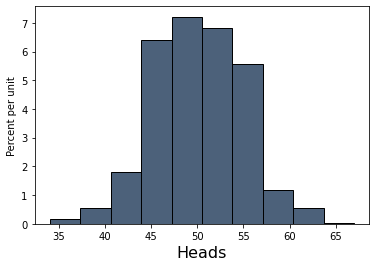

In [21]:
Table().with_column('Heads', outcomes).hist()

**Question 2.** If someone made a claim that they flipped a coin 100 times and got 55 heads, would you think it happened by chance or due to their skill level with regards to being able to flip a coin? What if they got 65 heads?

### Sampling from a Population

Let's pretend that our data set represents every single flight delay for United Airlines (i.e., we'll think of it as the population).

In [22]:
united = Table.read_table('data/united.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


**Question 3.** What do you notice about the delay times? Use the code cells below to explore the data.

In [24]:
np.mean(united.column('Delay'))

16.658155515370705

In [25]:
np.max(united.column('Delay'))

580

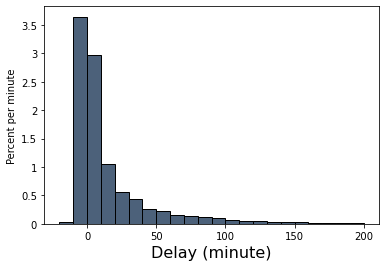

In [26]:
delay_bins = np.arange(-20, 201, 10)
united.hist('Delay', bins=delay_bins, unit='minute')

Now let's sample from it with replacement and make a histogram. What do you think will happen as the sample size increases?

In [27]:
def empirical_hist_delay(n):
    """Sample n times time with replacement from the united 
       Table and make a histogram of the distribution.
    """
    united.sample(n).hist('Delay', bins=delay_bins, unit='minute')

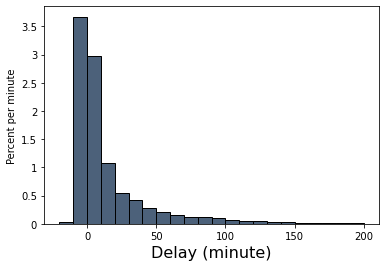

In [31]:
empirical_hist_delay(10000)

**Question 4.** What do you notice as the sample size increases?

## Swain vs. Alabama

Swain, a black man, was indicted and convicted of rape in the Circuit Court of Talladega County, Alabama, and sentenced to death by an all white jury. The case was appealed to the Supreme Court, in part, on the ground that there were no black jurors. Of the eligible jurors in the county, 26% were black, but panels since 1953 averaged 10% to 15% black jurors and no black juror had actually served on a petit jury since 1950 ([Wikipedia](https://en.wikipedia.org/wiki/Swain_v._Alabama)).

We can use the `sample_proportions` function (from the `datascience` package) to sample from a known proportion.

In [32]:
# Make an array of the known proportions
population_proportions = make_array(.26, .74)
population_proportions

array([0.26, 0.74])

In [35]:
sample_proportions(100, population_proportions)

array([0.32, 0.68])

In [39]:
def panel_proportion():
    """Sample proportion of black jurors chosen at random.
    """
    return sample_proportions(100, population_proportions).item(0)

In [40]:
panel_proportion()

0.25

In [41]:
# Set the number of times to repeat the experiment
repetitions = 10000

# Initialize an array to store the outcome from each experiment
panels = make_array()

# for loop to repeat the experiment and store the number of black jurors to an array
for i in np.arange(repetitions):
    new_panel = panel_proportion()*100
    panels = np.append(panels, new_panel)

Finally we can visualize the distribution of black jurors chosen by making a histogram by creating a Table from the panels array and plotting a histogram using the .hist() function.

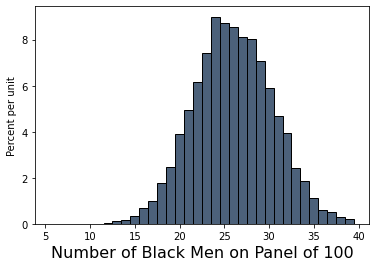

In [42]:
Table().with_column('Number of Black Men on Panel of 100', panels).hist(bins=np.arange(5.5,40.))

**Question 5.** Do you think it would have been likely for no black jurors to be chosen for this case? Explain.

**Question 6.** Suppose you wanted to design a game for children ages 3-6. What kinds of things would you need to consider? Make a list of design specifications that need to met before you game can be produced, manufactured, and sold. 

## Hi-Ho! Cherry-O! [[3]](https://www.ncssm.edu/directory/taylor-gibson)

In this activity, we'll be building a simulation of the classic children's game, Hi-Ho! Cherry-O!

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ffarm3.staticflickr.com%2F2342%2F2352999023_28c32dc926_o_d.jpg&f=1&nofb=1" width=500>

If you're not familiar with this game run the cell below, there's a video that explains the rules:

<iframe width="560" height="315" src="https://www.youtube.com/embed/81rf8hLjnRE" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

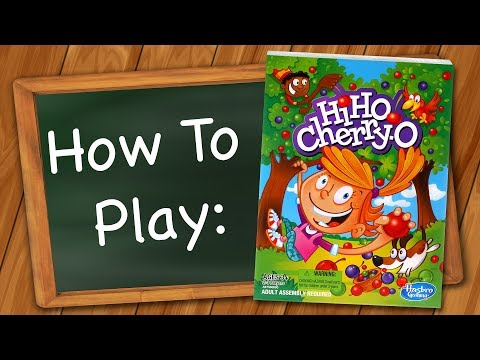

In [43]:
from IPython.display import YouTubeVideo
YouTubeVideo('81rf8hLjnRE', width=500)

This kind of game is perfect for a simple simulation because it has the following characteristics:
* Players do not interact with each other.
* Each turn is exactly like the previous turn. The result of one turn does not impact the way the next turn is played.
* Each turn is determined by a random event (no strategy or skill required).
* There is a clear condition for the game to end.

Coincidentally these are probably the same reasons that this game is great for children between the ages of 2 and 5.

In this activity we will **only** simulate the game from the point of view of one player, **you**!

### The Spinner

Let's start by making an array that contains the possible outcomes for the spinner:
* One
* Two
* Three
* Four
* Bird
* Dog
* Bucket

**Step 1.** Make an array that contains these outcomes as `string` type objects. Name that array `spinner`.

In [44]:
spinner = make_array('One', 'Two', 'Three', 'Four', 'Bird', 'Dog', 'Bucket')
spinner 

array(['One', 'Two', 'Three', 'Four', 'Bird', 'Dog', 'Bucket'],
      dtype='<U6')

In this activity we we'll use `np.random.choice` (a `numpy` function that generates a random sample from a given 1-dimensional array). 

After defining the array, use the `np.random.choice` function in the cell below to "spin the wheel" a few times and make sure you know how to randomly obtain an outcome from the spinner

In [48]:
np.random.choice(spinner)

'Two'

### One Spin

**Step2.** The function below, `one_spin`, will take in the current number of cherries in the bucket, spins the spinner using `np.random.choice`, and then computes how many cherries are in the bucket after the spin. The new number of cherries in the bucket is returned from this function as an integer.

Examine the complicated series of `if` and `elif` statements to make sure you understand their logic. In particular, check out the section that checks to make sure spinning Dog or Bird doesn't cause your cherry count to become negative.

In [49]:
def one_spin(current_count):
    """Simulate one spin of the spinner.
    """
    # Spin the spinner to create a string of the outcome
    spin = np.random.choice(spinner)
    
    # Use if/elif statements to determine what that 
    # outcome means for the new number of cherries 
    # in the bucket
    
    if spin == 'One':
        new_count = current_count+1
    elif spin == 'Two':
        new_count = current_count+2
    elif spin == 'Three':
        new_count = current_count+3
    elif spin == 'Four':
        new_count = current_count+4
    elif (spin == 'Bird' or spin == 'Dog'):
        new_count = current_count-2 
        
        # If subtracting 2 from the Bird or Dog causes new_count 
        # to be negative then the new_count should really be 0 
        # since you can't have negative cherries in your bucket
        if new_count < 0:
            new_count = 0      
    elif spin == 'Bucket':
        new_count = 0
   
    return new_count

Try this function out by running the cell below a few times. You should (hopefully) see all the possible outcomes appear after a few spins. Since the input to the function is 3, you could possibly see results of 0 (bucket), 1 (bird or dog), 4 (one), 5 (two), 6 (three), or 7 (four). You should **not** see outputs of 2 or 3, since there are no ways to reduce the number of cherries in the bucket by 1 or have them stay the same.

In [53]:
one_spin(3)

5

### One Game

**Step 3.** Now that we have a way to determine the number of cherries that will be in our bucket after a spin of the spinner, let's turn that into a function that simulates a single game. We'll call that function `one_game`. Here are some ideas to get this function started.

#### `bucket`
We're going to use the number of cherries in the bucket to determine if the game is over. At the start of the game, there will be 0 cherries in the bucket. We'll know the game is over when the number of cherries in the bucket is 10 or more. When you call the function, it will create a variable named `bucket` that starts at 0.

#### `turns`
In this simulation, **the statistic we're going to collect is the number of turns it takes to complete a game**. When you call the function `one_game` it will create a variable named `turns` that starts at 0.

#### `max_turns`
Imagine a situation where you keep spinning bucket, Dog, and/or Bird very frequently. You could end up with a game that went out for a very long time. In fact, there's nothing that would stop you from playing a game that never ended! While is outcome is essentially impossible it's not *that* uncommon to have a game that goes on for a few hundred spins. To help make sure we don't end up with a game that goes on too long, we'll set `max_turns` to a value low enough so things don't go on too long. 200 should be low enough to not impact our analysis later on.

In [ ]:
def one_game():
    """Simulate one game of Hi-Ho! Cherry-O!
    """
    bucket = ...
    turns = ...
    max_turns = ...

    # You write a for loop below that runs until bucket >= 10
    # or it runs for max_turns number of times. Remember, a 
    # return statement will force a loop to complete, so if you 
    # determine bucket >= 10 and then return turns the loop will stop
    
    ...
        # update the number of cherries in the bucket using one_spin
        ...
        
        # update the number of turns that have been taken
        ...
        
        # check to see if the game is over, if so return the number of spins
        # this will cause the loop to finish, even if it didn't make it through
        # the full array of values we're using to play max_turns
        ...

    # if your code makes it here, that means it played the max number of turns
    # and the loop finished. just return the number of
    return turns

In [54]:
def one_game():
    """Simulate one game of Hi-Ho! Cherry-O!
    """
    bucket = 0
    turns = 0
    max_turns = 200

    # You write a for loop below that runs until bucket >= 10
    # or it runs for max_turns number of times. Remember, a 
    # return statement will force a loop to complete, so if you 
    # determine bucket >= 10 and then return turns the loop will stop
    
    for turn in np.arange(max_turns):
        
        # Update the number of cherries in the bucket using one_spin
        bucket = one_spin(bucket)
        
        # Update the number of turns that have been taken
        turns = turns+1
        
        # Check to see if the game is over, if so return the number of spins.
        # This will cause the loop to finish, even if it didn't make it through
        # the full array of values we're using to play max_turns.
        # Return the number of turns.
        if bucket >= 10:
            return turns

    # If your code makes it here, that means it played the max number of turns
    # and the loop finished. 
    # Return the number of turns.
    return turns

If you wrote the function correctly, running the cell below will display the number of turns needed to complete a single game. Run it a few times to get a feel for a typical result.

In [57]:
one_game()

13

### Analysis of Games

**Step 4.** Now that we have a way to simulate a single game, let's play 10,000 games and analyze the results. In the cell below:

* create an empty array called `outcomes`.

* create a variable `num_of_games` that's set equal to 10,000.

* create a loop that will run `num_of_games` times.

* each time the loop runs it should play a game using `one_game` and append the result to the array you've named `outcomes`.

In [ ]:
outcomes = ...

...
    ...

In [58]:
num_of_games = 10000
outcomes = make_array()

for game in np.arange(num_of_games):
    outcomes = np.append(outcomes, one_game())

What are some results you infer about this game from the array of statistics we created about the length of the games? This is a good chance for you to practice your `numpy` commands.

To get you started, can you compute:

* What was the longest game that was simulated?

* What was the shortest game that was simulated?

* What was the average number of turns per simulated game?

* What proportion of games were completed in 10 turns or less? **Hint:** Use a comparison operator (e.g. `==`, `<=`, ...) and `np.sum` to first count how many games meet this condition, then convert to a proportion.

* What proportion of games took 50 or more turns to complete?

See if there's anything else you can determine using the array of `outcomes`. If you find anything of interest, share on the course discussion board.

**NOTE:** Since these games are played using random events, your results may vary from your classmates or the solutions.

In [ ]:
# Longest game
...

In [59]:
# Longest game
np.max(outcomes)

117.0

In [ ]:
# Shortest game
...

In [60]:
# Shortest game
np.min(outcomes)

3.0

In [ ]:
# Average game
...

In [61]:
# Average game
np.average(outcomes)

15.8219

In [ ]:
# Proportion of games finished in 10 turns or less
...

In [62]:
# Proportion of games finished in 10 turns or less
np.sum( outcomes <= 10 )/len(outcomes)

0.4306

In [ ]:
# Proportion of games that took 50 or more turns
...

In [63]:
# Proportion of games that took 50 or more turns
np.sum( outcomes >= 50 )/len(outcomes)

0.0249

### Visualization

**Step 5.** To create some visualizations, our array needs to be put into a table. In the cell below, create a table named `outcomes_table` that has a single column labeled `'Turns'`.

In [ ]:
outcomes_table = ...
outcomes_table

In [64]:
outcomes_table = Table().with_column('Turns', outcomes)
outcomes_table

Turns
15
27
9
81
22
5
12
23
24
8


Create a histogram to visualize the distribution of scores. Use the suggested bins that are provided in the code block below. You can use them in your `.hist()` call by including `bins = suggested_bins` after you've specified the column name. The suggested bins will automatically scale from 0 to the largest score using a bin width of 2.

In [ ]:
suggested_bins = ...
...

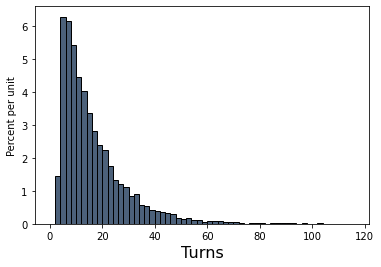

In [65]:
suggested_bins = np.arange(0, np.max(outcomes), 2)
outcomes_table.hist('Turns', bins = suggested_bins)

**Question 7.** Make a 3-slide presentation to explain your analysis of game play to the VP of Game Development. Use the results from the outcome of your simulation. Remember the VP is busy, she's only going to give you 5 minutes to present.

**References**

[1] *Computational and Inferential Thinking*, Ani Adhikari and John DeNero and David Wagner, 10.3.5. The Power of Simulation.

[2] *Computational and Inferential Thinking*, Ani Adhikari and John DeNero and David Wagner, 10.1.2. Empirical Distributions. 

[3] This activity was designed by Taylor Gibson, Dean of Mathematics at the North Carolina School of Science and Mathematics